In [1]:
#import pandas, numpy and matplotlib libraries
import random as r
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import math
from mpl_toolkits.mplot3d import Axes3D

#import the iris dataset from and store it as dataSet
dataSet = pd.read_csv("irisdata.csv")

#remove the 1st iris class data  
dataSet = dataSet[dataSet.species != "setosa"]

#add the column 'class' with values 0 for versicolor and 1 for virginica
irisClass = []
for item in dataSet.species:
    if item == "versicolor":
        irisClass.append(0)
    elif item == "virginica":
        irisClass.append(1)

dataSet['class'] = irisClass

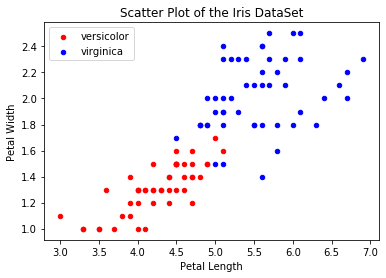

In [2]:
# Exercise 1, part a
df = pd.DataFrame(dict(x=dataSet['petal_length'], y= dataSet['petal_width'], label=dataSet['species']))
colors = {"versicolor":'red', "virginica":'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.title("Scatter Plot of the Iris DataSet")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [3]:
# Exercise 1, part b

# LogisticReg function calculates the logistic regression given a list of weights, x_1 and x_2
def logisticReg(w,x_1,x_2):
    
    z = w[0] + w[1]*x_1 + w[2]*x_2
    logisticRegression = 1 / (1 + np.exp(-(z)))
    
    return logisticRegression

# neural Network function returns 1 if is the logistic regression > 0.5 and 0 otherwise 
def neuralNetwork(logisticRegression):
    
    if logisticRegression > 0.5:
        output = 1
    elif logisticRegression <= 0.5:
        output = 0
    
    return output 

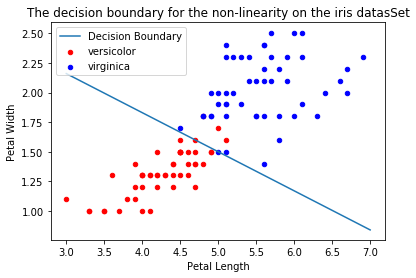

In [39]:
# Exercise 1, partC

# List of weights, we found roughly separates the two classes 
w = [-3.15, 0.33, 1]

#plotting the scatter plot of the data set
df = pd.DataFrame(dict(x=dataSet['petal_length'], y= dataSet['petal_width'], label=dataSet['species']))
colors = {"versicolor":'red', "virginica":'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    

# decision Boundary function that plots the line representing the decision boundary given a list of weights
def descisonBoundary (w):
    x_values = np.array(range(3,8))
    y_values = []
    for x in x_values:
        y = (-w[0]-w[1]*x)
        y_values.append(y)
    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.legend()
    

    
descisonBoundary(w)
plt.title("The decision boundary for the non-linearity on the iris datasSet")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

Text(0.5, 0, 'Petal Width')

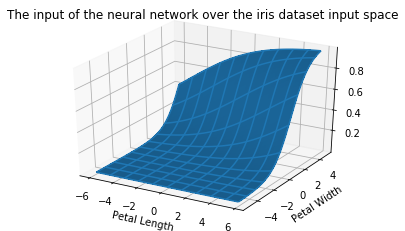

In [5]:
# Exercise 1, part d

# 3D plot showing the input of our simple neural network over the input space 
fig = plt.figure()
ax = fig.gca(projection='3d')

#Creating the ranges for X_1 and X_2
X_1 = np.arange(-6,6,0.2)
X_2 = np.arange(-5,5,0.2)

#Using the np.meshgrid method to prepare the X_1 and X_2 arrays to be plotted in 3D using the plot_surface
X, Y = np.meshgrid(X_1, X_2)

#Calculating the Z values
Z = logisticReg(w,X,Y)

#Plotting the 3D surface
surf = ax.plot_surface(X, Y, Z,linewidth=0, antialiased=False)

#Plotting the wireframe overlay
ax.plot_wireframe(X, Y, Z,rcount = 10, ccount = 10)

plt.title('The input of the neural network over the iris dataset input space')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [6]:
# Exercise 1, part e

test1 = neuralNetwork(logisticReg(w,4.2,1.3))
print(test1)

test2 = neuralNetwork(logisticReg(w,5.1,2.4))
print(test2)

test3 = neuralNetwork(logisticReg(w,5.0,1.5))
print(test3)

test4 = neuralNetwork(logisticReg(w,5.0,1.7))
print(test4)

0
1
1
1


In [7]:
# Q2 Part A code

# Data sets being used
y_data = dataSet['class']
X_data = dataSet[['petal_length','petal_width']]

def mean_squared_error(w, X, y):

# Input Feature Values into a list
  petalLength = X['petal_length'].tolist()
  petalWidth = X['petal_width'].tolist()
  # Outputs of neural network for each example
  nrow = len(petalLength)
  outputs = [0]*nrow

#neural network logistic function output for each point
  for i in range(nrow):
    outputs[i] = logisticReg(w, petalLength[i], petalWidth[i])

  difference = np.subtract(outputs,y)
  # Compute the mean between the outputs and the labels (0,1)
  result = np.mean(np.power(difference,2))

  # Return result
  return result


High Mean Square Error: 0.3764989845976266


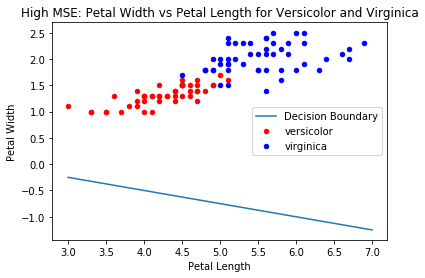

In [12]:
# Q2 part B code

# High error values handpicked
wH = [-0.5,0.25,1]
print ('High Mean Square Error:', mean_squared_error(wH, X_data, y_data))


df = pd.DataFrame(dict(x=dataSet['petal_length'], y= dataSet['petal_width'], label=dataSet['species']))
colors = {"versicolor":'red', "virginica":'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    

descisonBoundary(wH)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('High MSE: Petal Width vs Petal Length for Versicolor and Virginica')
plt.show()

Low Mean Square Error: 0.15202604955133647


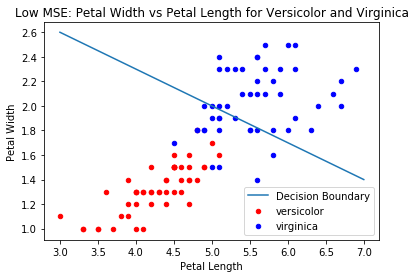

In [13]:
# Low error values
wL = [-3.5,0.3,1]
print ('Low Mean Square Error:', mean_squared_error(wL, X_data, y_data))

#plot graph
df = pd.DataFrame(dict(x=dataSet['petal_length'], y= dataSet['petal_width'], label=dataSet['species']))
colors = {"versicolor":'red', "virginica":'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    

descisonBoundary(wL)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Low MSE: Petal Width vs Petal Length for Versicolor and Virginica')
plt.show()

In [14]:
# Q2 part E code

def gradsum(X, y, w):
  gw0 = 0      #gradient value for w0
  gw1 = 0      #gradient value for w1
  gw2 = 0      #gradient value for w2
  m = len(X)

  # Loop through all the input data
  for i in range(m):
    pL = X['petal_length'].tolist()
    x_i1 = pL[i]
    pW = X['petal_width'].tolist()
    x_i2 = pW[i]
    lab = y.tolist()
    y_i = lab[i]

    # Output of neural network for each input i
    s = logisticReg(w, x_i1, x_i2)

    # Add the value to the sum for each gradient component
    gw0 += ((2/m)*(s-y_i)*s*(1-s))
    gw1 += ((2/m)*(s-y_i)*s*(1-s)*x_i1)
    gw2 += ((2/m)*(s-y_i)*s*(1-s)*x_i2)

  # Make list of all three values
  result = []
  result.append(gw0)
  result.append(gw1)
  result.append(gw2)

  return result

[1, 1, 1]
MSE Original: 0.4982996056347649
[-6.448027    0.03598578  3.83480709]
MSE New: 0.0793692984858798


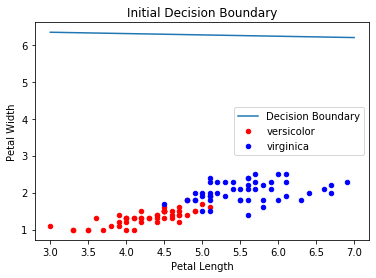

In [15]:
# Chosen original decision boundaries
ws = [1,1,1] 
print(ws)
#Original MSE
print('MSE Original:', mean_squared_error(ws, X_data,y_data))

# iterate 50000 times to show change with small step size of 0.01
for _ in range(50000):
  # Step size is 0.01 here
  ws = np.subtract(ws,np.multiply(gradsum(X_data,y_data,ws),0.01))

# New decision boundaries and the MSE after iterations for a small step size
print(ws)
print('MSE New:', mean_squared_error(ws,X_data,y_data))

df = pd.DataFrame(dict(x=dataSet['petal_length'], y= dataSet['petal_width'], label=dataSet['species']))
colors = {"versicolor":'red', "virginica":'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    

descisonBoundary(ws)
plt.title('Initial Decision Boundary') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

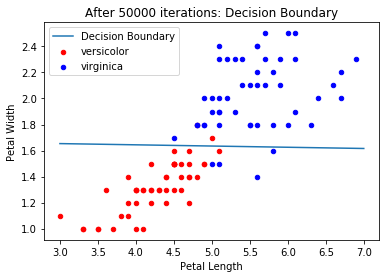

In [16]:
# values taken from the result of the new decision boundaries as calculated above
wn = [-6.44802700/3.83480709,0.03598578/3.83480709, 1]

     
df = pd.DataFrame(dict(x=dataSet['petal_length'], y= dataSet['petal_width'], label=dataSet['species']))
colors = {"versicolor":'red', "virginica":'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    

descisonBoundary(wn)
plt.title('After 50000 iterations: Decision Boundary')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [52]:
def optimize(w,step_size, no_iterations, display_curve):
  mse = [0]*no_iterations
  iteration = [0]*no_iterations
  preW = [0]*3
  mm = 0 

  for i in range(no_iterations):
    # break this loop if too small a difference
    if abs(w[0] - preW[0]) < 0.00005 and abs(w[1] - preW[1]) < 0.00005 and abs(w[2] - preW[2]) < 0.00005:
      print("Weight difference is less than 0.00005")
      mm = i
      break
    
    #create data for learning curve
    mse[i] = mean_squared_error(w,X_data, y_data) 
    iteration[i] = i
    
    #reset both the previous w values and append current w values with gradsum values
    preW = w[:]
    w = np.subtract(w,np.multiply(gradsum(X_data,y_data,w),step_size))
  
  #in case more iterations occur but weight difference is too small, get rid of that data
  if mm != 0:
    del mse[mm:]
    del iteration[mm:]
  
  #print new MSE values and the w values
  print(w)
  print('MSE:' , mean_squared_error(w, X_data, y_data))

  #code for the learning curve plot
  def learning_curve():
    plt.clf()
    plt.cla()
    plt.close()
      # Learning curve
    plt.figure(0)
    plt.plot(iteration,mse, '-b')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title("Learning curve with step " + str(step_size))
    plt.xlim(-1,no_iterations)
    plt.show()
  
  #code for the decision boundary line over the iris data
  def current_plot():
    
    wf = [w[0]/w[2], w[1]/w[2], 1]
    df = pd.DataFrame(dict(x=dataSet['petal_length'], y= dataSet['petal_width'], label=dataSet['species']))
    colors = {"versicolor":'red', "virginica":'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

    
    descisonBoundary(wf)
    plt.title("Decision Boundary")
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()

  if display_curve == 'FALSE':
    current_plot()
  else:
    learning_curve()

In [47]:
# Q3 part C code

wcc = [r.uniform(-10,0),r.uniform(0,1),r.uniform(0,10)]

[-8.41077436  0.43872609  7.16388763]
MSE: 0.407359112360415


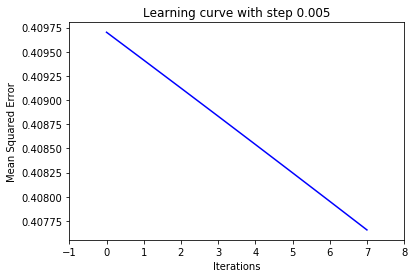

In [48]:
optimize(wcc,0.005,8, 'TRUE')

[-8.41077436  0.43872609  7.16388763]
MSE: 0.407359112360415


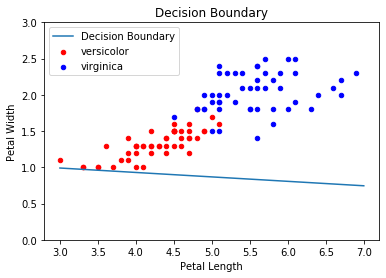

In [49]:
optimize(wcc,0.005,8, 'FALSE')

[-8.5716221  -0.23532868  6.95594717]
MSE: 0.13130504396127765


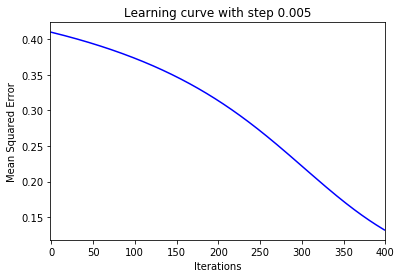

In [50]:
optimize(wcc,0.005,400, 'TRUE')

[-8.5716221  -0.23532868  6.95594717]
MSE: 0.13130504396127765


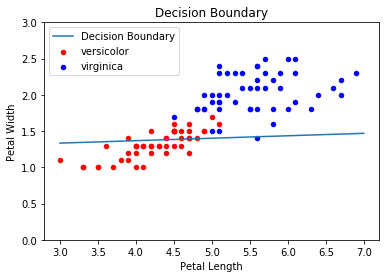

In [51]:
optimize(wcc,0.005,400, 'FALSE')

Weight difference is less than 0.00005
[-5.26124784 -0.48875626  4.69270911]
MSE: 0.08975276227338387


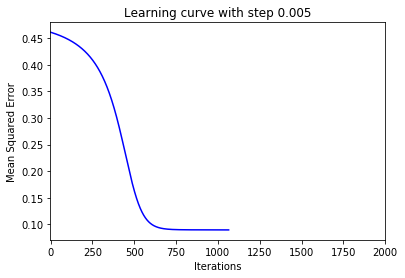

In [23]:
optimize(wcc,0.005,2000, 'TRUE')

Weight difference is less than 0.00005
[-8.64425289 -0.51418289  6.8589226 ]
MSE: 0.0680771390351695


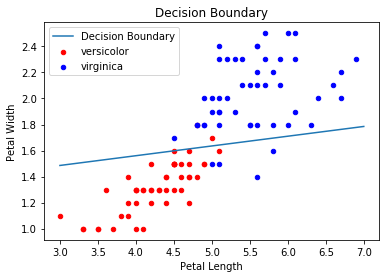

In [53]:
optimize(wcc,0.005,2000, 'FALSE')

In [25]:
# Exercise 4: Extra Credits
#define the attributes matrix to be the first four columns, and the classes vector to be the species column
dataSet_full = pd.read_csv("irisdata.csv")
attributes = dataSet_full.iloc[:,0:4].values
classes = dataSet_full.iloc[:,4:].values

In [26]:
#Using the teain_test_split method from the skleran library to split the data set to 25% test and 75% train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(attributes, classes, test_size = 0.33)
Y_train = np.ravel(Y_train)

In [29]:
#Using the MLPClassifier method from the sklearn library to train our neural classifer with one hidden layer of size 8
from sklearn.neural_network import MLPClassifier
neural_classifer = MLPClassifier(hidden_layer_sizes=(8),  max_iter=50000)
neural_classifer.fit(X_train, Y_train)
Y_neural_predections = neural_classifer.predict(X_test)

In [30]:
report_neural = skl.metrics.classification_report(Y_test, Y_neural_predections)
print(report_neural)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       1.00      0.94      0.97        17
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



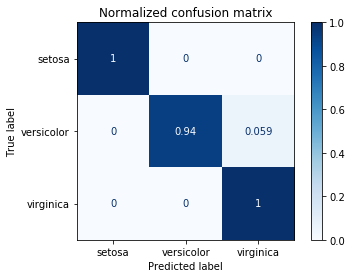

In [31]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(neural_classifer, X_test, Y_test, display_labels=["setosa", "versicolor", "virginica"], 
                             cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifer = KNeighborsClassifier(n_neighbors = 7)
knn_classifer.fit(X_train,Y_train)
Y_knn_predections = knn_classifer.predict(X_test)

In [46]:
report_knn = skl.metrics.classification_report(Y_test, Y_knn_predections)
print (report_knn)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50



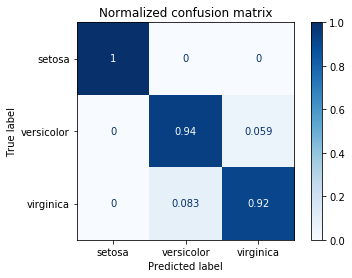

In [43]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn_classifer, X_test, Y_test, display_labels=["setosa", "versicolor", "virginica"], 
                             cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Normalized confusion matrix")
plt.show()
